MNIST is the "Hello World" for ML

Classification


In [1]:
%matplotlib inline 
# this forces images to appear on Jupyter

# download MNIST through sklearn
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version =1)
mnist.keys()
#mnist.values()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X = mnist["data"]
y = mnist["target"]

#NOTE: mnist y_labels are in string format; 
# turn into numeric
y = y.astype(np.uint8)

print("In X, these are " + str(X.shape[0]) + " images, and each represented by " 
+ str(X.shape[1]) + " values")

In X, these are 70000 images, and each represented by 784 values


This image shows the figure 7


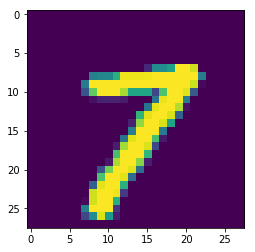

In [3]:
# Known Fact: we know each image is 28x28 (784) in this dataset
import numpy as np
import matplotlib.pyplot as plt
random_num = int(np.random.rand()*7000)
pick_one_image = X[random_num].reshape(28,28)
print("This image shows the figure " + str(y[random_num]))
plt.imshow(pick_one_image)
plt.show()

In [4]:
X_train, X_test, y_train, y_test= X[0:6000], X[6000:], y[0:6000], y[6000:]

In [5]:
# Binary Classifier - detects '8' (a 8 or not a 8)

y_train_8_T_or_F = (y_train ==8)
y_test_8_T_or_F = (y_test == 8)
print("y_train_8_T_or_F looks like: \n\n", np.matrix(y_train_8_T_or_F).T)

y_train_8_T_or_F looks like: 

 [[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [6]:
# Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state= 821150, max_iter = 1000, tol = 0.001) # SGD algo invovles randomization

# Train an OCC (one-class-classification) classifier
OCC_clf = sgd_clf.fit(X_train, y_train_8_T_or_F)
# Classify whether the entry we picked above is an 8 or not
OCC_result = sgd_clf.predict([X[random_num]])

# Train an multiclass classifier
multiclass_clf = sgd_clf.fit(X_train, y_train)
# Classify which class it is
multiclass_result = sgd_clf.predict([X[random_num]])

print("Result for classifiying whether it is an 8 is: ", OCC_result)
print("Result for classification of this digit is: ", multiclass_result)

Result for classifiying whether it is an 8 is:  [False]
Result for classification of this digit is:  [7]


NOTES:
The above multiclass classifier is simply creating 10 OCC_clf for each of the digits;
This method (repeating binary clf for multicalss) is called OvA (one verses Any).
And because sklearn uses OvA, we can asks the model to spit out the score for each of 
these OCC_clf

In [12]:
all_OCC_clf_score = sgd_clf.decision_function([X[random_num]])
print(all_OCC_clf_score)
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
np.argmax(all_OCC_clf_score)

[[ -862753.9639604   -475859.39907521  -310434.51416501  -385074.31876047
   -526449.25000049  -445049.34796636 -1488624.85690974   199266.56562351
   -236952.95866098  -211352.64023887]]


7

----------------------------------------------------------------------------------------------------

In [8]:
# to force an one_vs_one method
from sklearn.multiclass import OneVsOneClassifier
ovoclf = OneVsOneClassifier(SGDClassifier(random_state = 821150,max_iter=1000, tol=0.001))
ovoclf.fit(X_train, y_train)
ovoclf.predict([X[random_num]])

array([7], dtype=uint8)

In [9]:
# random_forest works too:

In [10]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
forest_clf.fit(X_train, y_train)
prob = forest_clf.predict_proba([X[random_num]]).T
print(prob)
np.argmax([prob])

C:\Users\joshuang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]


7